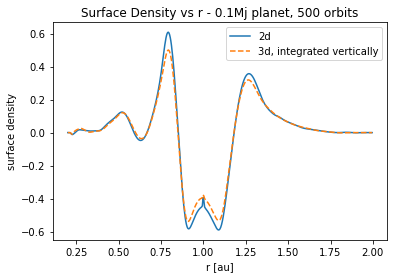

In [2]:
import readfargo3d as fg
import matplotlib.pyplot as plt

dir1 = './bae2017_01jup1400x512/'
dir2 = './p3disof_test01jup/'

itime = 50
r0 = 1.0
fargo1    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
#fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
#fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
#fargo4i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)

rho3d = fargo2.rho.sum(axis=2)*fargo2.r
rho3di = fargo2i.rho.sum(axis=2)*fargo2i.r

plt.plot(fargo1.r,(fargo1.rho.mean(axis=0)-fargo1i.rho.mean(axis=0))/fargo1i.rho.mean(axis=0), label='2d')
plt.plot(fargo2.r,((rho3d - rho3di)/rho3di).mean(axis=0), label='3d, integrated vertically',linestyle='dashed')
#plt.plot(fargo2.r,((fargo2.rho.mean(axis=0).sum(axis=1)*fargo2.r -fargo2i.rho.mean(axis=0).sum(axis=1)*fargo2.r)/fargo2i.rho.mean(axis=0).sum(axis=1)/fargo2.r), label='3d')
plt.legend()
#plt.xlim(0.2,100)
#plt.ylim(-3,9)
plt.xlabel('r [au]')
plt.ylabel('surface density')
plt.title('Surface Density vs r - 0.1Mj planet, '+str(itime*10)+' orbits')
plt.savefig('3D01Mj_density_r'+str(itime*10)+'.png',dpi=300,bbox_inches='tight')

In [25]:
print((fargo2.rho.mean(axis=0)).sum(axis=1).shape)

(512,)


In [27]:
#print(fargo2.rho.mean(axis=0)[:,34])

1000


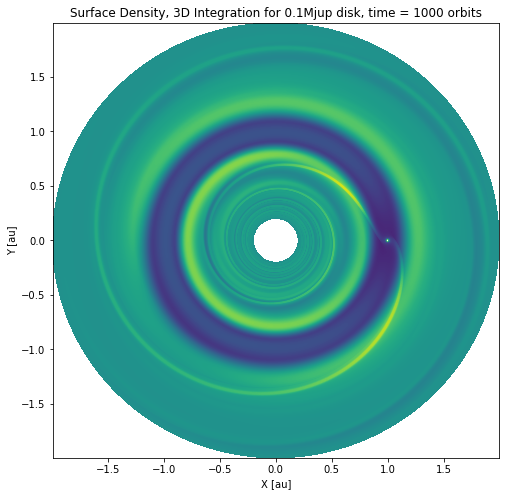

In [6]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl
import readfargo3d as fg

path = './p3disof_test01jup/'
itime = 100
fargo    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 
fargoi    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 

phi = fargo.phi
rad = fargo.r

rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                         

X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

rho3d = fargo.rho.sum(axis=2)*fargo.r
rho3di = fargoi.rho.sum(axis=2)*fargoi.r

print(itime*10)

vmin = -1
vmax = 1
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(X, Y,((rho3d - rho3di)/rho3di), levels=levels)
#cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
#fig.colorbar(cp, cax=cax,orientation='horizontal')
#fig.subplots_adjust(top=0.82, bottom=0.15)
#ax.set_xlim(-100,100)
#ax.set_ylim(-100,100)
ax.set_xlabel('X [au]')
ax.set_ylabel('Y [au]')
ax.set_title(f'Surface Density, 3D Integration for 0.1Mjup disk, time = {itime*10} orbits')
#plt.close()
plt.savefig('3D_image_01mjup'+str(itime*10)+'.png',dpi=300)




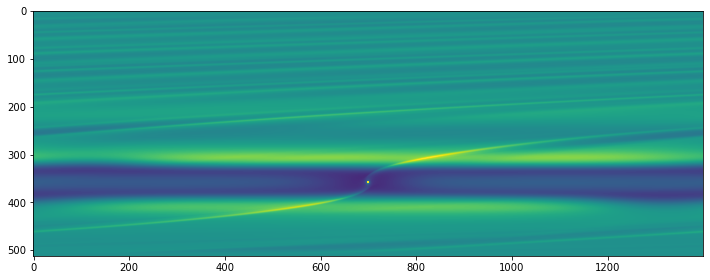

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

ax.imshow((fargo2.rho.sum(axis=2)/fargo2i.rho.sum(axis=2)).T,vmin=0,vmax=2)



700


Text(0.5, 1.0, 'δΣ/Σinit, time = 700 orbits')

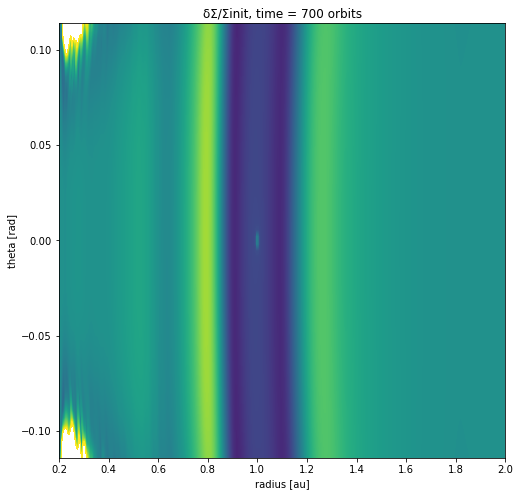

In [4]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './p3disof_test01jup/'
#path = './p3disof_0planet/'

fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path) 

nf = 70
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]
theta= np.loadtxt(path +'domain_z.dat')

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                          
rad   = 0.5*(rad[:-1] + rad[1:])



rad2d, phi2d = np.meshgrid(rad, phi)                                                                                                                          
rad3d , phi3d, theta3d = np.meshgrid(fargo2.r,fargo2.phi,fargo2.theta)
X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)


nx = len(phi)
ny = len(rad)
nz = len(theta)

print(nf*10)

vmin = -.7
vmax = .7
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(fargo2.r, (rad3d*np.cos(theta3d)).mean(axis=0).mean(axis=0),(((fargo2.rho.sum(axis=0)-fargo2i.rho.sum(axis=0))/fargo2i.rho.sum(axis=0))).T, levels=levels)
ax.set_xlim(.2,2)
#ax.set_ylim(1.42,1.72)
ax.set_xlabel('radius [au]')
ax.set_ylabel('theta [rad]')
ax.set_title(f'δΣ/Σinit, time = {nf*10} orbits')
#plt.close()
#plt.savefig('xz3D_image_3mjup.png')

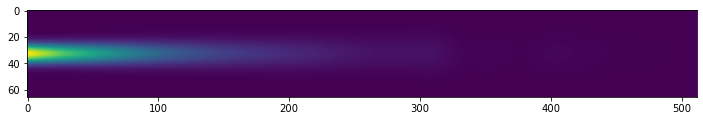

In [8]:

fig, ax = plt.subplots(figsize=(12,12))

ax.imshow(fargo2.rho.mean(axis=0).T)
